In [1]:
# Importing libraries

import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print('Done Importing!')

Done Importing!


In [2]:
# Setting Paths

symp_path='Data/256_crop_symptoms'
nosymp_path='Data/256_crop_nosymptoms'

# Getting info about dataset

image_names=glob.glob(symp_path+"/*.tiff")+glob.glob(nosymp_path+"/*.tiff")
symp_no = len(glob.glob(symp_path+"/*.tiff"))
nosymp_no = len(glob.glob(nosymp_path+"/*.tiff"))
total_images=len(image_names)
print('Total number of images having symptoms of DR:',symp_no)
print('Total number of images having no symptoms of DR:',nosymp_no)
print('Total number of images:',total_images)

Total number of images having symptoms of DR: 595
Total number of images having no symptoms of DR: 1468
Total number of images: 2063


Image: Data/256_crop_symptoms/Data/256_crop_symptoms\1296_right.tiff


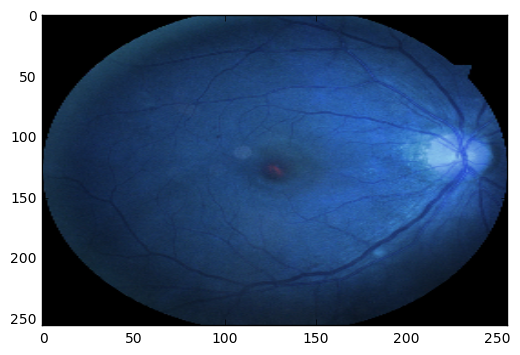

Shape:  (256, 256, 3)
Dataset shape:  (2063, 256, 256, 3)


In [3]:
# Printing a random image

rand = np.random.randint(symp_no)
rand_img_name=symp_path+'/'+image_names[rand]
print('Image:',rand_img_name)
x=cv2.imread(image_names[rand])
plt.imshow(x,aspect='auto')
plt.show()

# Adding images in matrix
img_r,img_c,no_channels=x.shape
print('Shape: ',x.shape)
X=np.ndarray(shape=(total_images,img_r,img_c,no_channels))
for index,image_name in enumerate(image_names):
    X[index,:,:,:] = cv2.imread(image_names[index])
print('Dataset shape: ',X.shape)

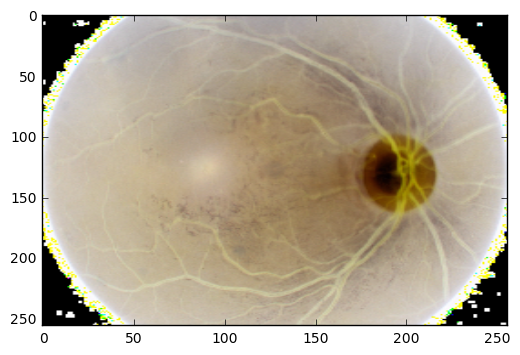

In [4]:
Y=np.zeros(total_images)
Y[0:symp_no]=1
# 1 --> symptoms
# 2 --> no symptoms
plt.imshow(X[np.random.randint(255)],aspect='auto')
plt.show()
# print(X)

In [5]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    print('######',labels.shape[0])
    shuffled_dataset = dataset[permutation]
    del dataset
    shuffled_labels = labels[permutation]
    del labels
    return shuffled_dataset, shuffled_labels

import psutil
print(psutil.virtual_memory())

svmem(total=8476975104, available=2107113472, percent=75.1, used=6369861632, free=2107113472)


In [6]:
shuffled_X,shuffled_Y=randomize(X,Y)

###### 2063


svmem(total=8476975104, available=4237651968, percent=50.0, used=4239323136, free=4237651968)


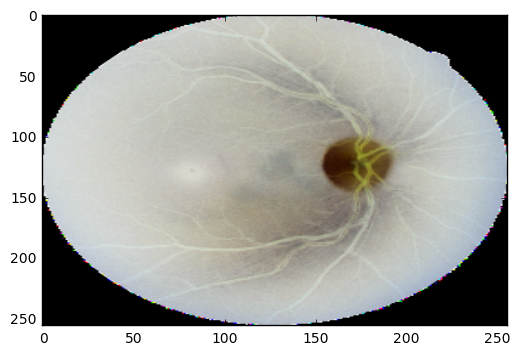

[[[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  ..., 
  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ..., 
   [ 0.  0.  0.]
   [ 0.  

In [7]:
train_X=shuffled_X[:1562]
train_Y=shuffled_Y[:1562]

val_X=shuffled_X[1563:1563+250]
val_Y=shuffled_Y[1563:1563+250]

test_X=shuffled_X[1563+250:]
test_Y=shuffled_Y[1563+250:]

del shuffled_X,shuffled_Y

print(psutil.virtual_memory())
plt.imshow(test_X[0],aspect='auto')
plt.show()
print(X)

In [9]:
print('Train shape: ',train_X.shape,'Train Labels',train_Y.shape)
print('Dev shape: ',val_X.shape,'Dev Labels',val_Y.shape)
print('Test shape: ',test_X.shape,'Test Labels',test_Y.shape)

Train shape:  (1562, 256, 256, 3) Train Labels (1562,)
Dev shape:  (250, 256, 256, 3) Dev Labels (250,)
Test shape:  (250, 256, 256, 3) Test Labels (250,)


In [10]:
print(psutil.virtual_memory())

svmem(total=8476975104, available=4764389376, percent=43.8, used=3712585728, free=4764389376)


In [11]:
#Flattening the datasets
def flatten(X):
    return X.reshape(X.shape[0],-1).T

train_X=flatten(train_X)
val_X=flatten(val_X)
test_X=flatten(test_X)

train_Y=flatten(train_Y)
val_Y=flatten(val_Y)
test_Y=flatten(test_Y)


In [12]:
print('Train shape: ',train_X.shape,'Train Labels',train_Y.shape)
print('Dev shape: ',val_X.shape,'Dev Labels',val_Y.shape)
print('Test shape: ',test_X.shape,'Test Labels',test_Y.shape)

Train shape:  (196608, 1562) Train Labels (1, 1562)
Dev shape:  (196608, 250) Dev Labels (1, 250)
Test shape:  (196608, 250) Test Labels (1, 250)


In [13]:
#Augmentation

In [17]:
print(test_X[0][5])

2.0
